# Activity 4 - Fundamental Convolution Application

Import the necessary libraries.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.signal import wavelets

Programmatically generate a sinusoidal wave, running at 500hz, an amplitude of 5 volts, with a sampling rate of 100, starting at time 0 with 0 offset.

In [2]:
start_time = 0 # Specify the starting time at 0.
end_time = 1 # Specify the ending time at 1.
sample_rate = 100 # Specify a sample rate of 100.
time = np.arange(start=start_time, stop=end_time, step=1/sample_rate) # Create time routines using the arange() method.

theta = 0 # Specify the offset.
frequency = 500 # Specify the frequency at 500Hz.
amplitude = 5 # Set the amplitude to 5.

sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta) # Construct the sinewave and store in an array.
sinewave # Preview the generated sinewave array values.

array([ 0.00000000e+00, -6.12323400e-15, -1.22464680e-14, -5.38968388e-14,
       -2.44929360e-14,  4.91096681e-15, -1.07793678e-13, -7.83897748e-14,
       -4.89858720e-14, -3.03799063e-13,  9.82193362e-15, -2.44991258e-13,
       -2.15587355e-13, -1.86183452e-13, -1.56779550e-13, -4.11592741e-13,
       -9.79717439e-14, -6.85678411e-14, -6.07598127e-13, -9.76003555e-15,
        1.96438672e-14, -5.19386419e-13, -4.89982516e-13, -4.60578613e-13,
       -4.31174710e-13, -4.01770807e-13, -3.72366905e-13, -3.42963002e-13,
       -3.13559099e-13, -8.52589385e-13, -8.23185482e-13, -7.93781579e-13,
       -1.95943488e-13, -7.34973774e-13, -1.37135682e-13,  4.60702409e-13,
       -1.21519625e-12, -6.17358163e-13, -1.95200711e-14, -5.58550357e-13,
        3.92877345e-14, -4.99742551e-13, -1.03877284e-12, -4.40934746e-13,
       -9.79965032e-13, -3.82126940e-13, -9.21157226e-13, -3.23319135e-13,
       -8.62349420e-13, -1.40137971e-12, -8.03541615e-13, -2.05703523e-13,
       -7.44733809e-13, -

Plot the generated sinewave.

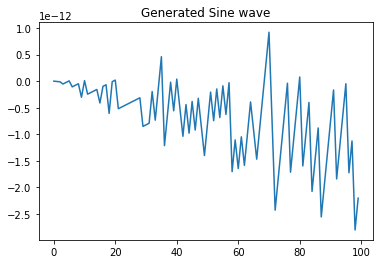

In [3]:
plt.plot(sinewave)
plt.title("Generated Sine wave")
plt.show()

Function to perform a convolution of two signals and generate the resulting plots and statistical analysis.

In [4]:
# Function convolving signals and takes the parameters of a main signal, kernel function to convolve with, and a label for the kernel function.
def convolveSignals(original_signal, original_signal_label, kernel_function, kernel_label):
    original_signal = np.array(original_signal) # Convert the original signal from a normal array into a numpy array.
    kernel_function = np.array(kernel_function) # Convert the kernel function from a normal array into a numpy array.
    result = np.convolve(original_signal, kernel_function) # Convolve the original signal and the kernel function.
    EXPORTS_PATH = './exports' # The 'exports/' path in the current directory.
    
    # Statistical Analysis
    analysis_df = pd.DataFrame(columns=['Signal', 'Mean', 'Standard Deviation', 'Standard Error']) # Create a new data frame to store the analysis summary.
    
    original_signal_mean = original_signal.mean() # Calculate the mean of the original signal.
    original_signal_std = original_signal.std() # Calculate the standard deviation of the original signal.
    original_signal_sem = original_signal.std() / np.sqrt(np.size(original_signal)) # Calculate the standard error of the original signal.
    original_new_entry = {'Signal':original_signal_label, 'Mean':original_signal_mean, 'Standard Deviation':original_signal_std, 'Standard Error':original_signal_sem} # Create a dictionary for the entry to be added to the analysis dataframe.
    analysis_df = analysis_df.append(original_new_entry, ignore_index=True) # Add the entry to the analysis dataframe.
    
    kernel_function_mean = kernel_function.mean() # Calculate the mean of the kernel function.
    kernel_function_std = kernel_function.std() # Calculate the standard deviation of the kernel function.
    kernel_function_sem = kernel_function.std() / np.sqrt(np.size(kernel_function)) # Calculate the standard error of the kernel function.
    kernel_new_entry = {'Signal':"Kernel Function {}".format(kernel_label), 'Mean':kernel_function_mean, 'Standard Deviation':kernel_function_std, 'Standard Error':kernel_function_sem} # Create a dictionary for the entry to be added to the analysis dataframe.
    analysis_df = analysis_df.append(kernel_new_entry, ignore_index=True) # Add the entry to the analysis dataframe.
    
    result_mean = result.mean() # Calculate the mean of the result of the convolved signals.
    result_std = result.std() # Calculate the standard deviation of the result of the convolved signals.
    result_sem = result.std() / np.sqrt(np.size(result)) # Calculate the standard error of the result of the convolved signals.
    result_new_entry = {'Signal':"Resulting Signal", 'Mean':result_mean, 'Standard Deviation':result_std, 'Standard Error':result_sem} # Create a dictionary for the entry to be added to the analysis dataframe.
    analysis_df = analysis_df.append(result_new_entry, ignore_index=True) # Add the entry to the analysis dataframe.
    
    EXPORTS_SUMMARY_PATH = './{}/summary'.format(EXPORTS_PATH) # The 'exports/summary/' path in the current directory.
    if not os.path.exists(EXPORTS_SUMMARY_PATH):
            os.makedirs(EXPORTS_SUMMARY_PATH) # Create the 'exports/images/' directory if it does not exists.
    
    CSV_FILE_NAME = "SUMMARY-signal({})-kernel({})".format(original_signal_label, kernel_label) # File name for the .csv file.
    analysis_df.to_csv('./{}/{}.csv'.format(EXPORTS_SUMMARY_PATH, CSV_FILE_NAME), index=False) # Exporting the file to current directory.
    
    
    # Plots
    fig = plt.figure(figsize=(20, 5)) # Set figure size.
    plt.subplots_adjust(wspace= 0.20, hspace= 0.50) # Adjust the spacing of subplots.

    original_signal_plt = fig.add_subplot(2,2,1) # Place the plot of the original signal on the first cell of the first row.
    plt.title("Original Signal ({})".format(original_signal_label)) # Add subplot title.
    original_signal_plt.plot(original_signal, color="blue") # Plot the original signal with the color set to blue.

    kernel_function_plt = fig.add_subplot(2,2,2) # Place the plot of the kernel function on the second cell of the second row.
    plt.title("Kernel Function: {}".format(kernel_label)) # Add subplot title.
    kernel_function_plt.plot(kernel_function, color="red") # Plot the kernel function with the color set to red.

    resulting_signal_plt = fig.add_subplot(2,2,(3,4)) # Place the plot of the resulting signal on the second row occupying two columns.
    plt.title("Resulting Signal") # Add subplot title.
    resulting_signal_plt.plot(result, color="purple") # Plot the resulting signal with the color set to violet.

    EXPORTS_IMAGES_PATH = './{}/images'.format(EXPORTS_PATH) # The 'exports/images/' path in the current directory.
    if not os.path.exists(EXPORTS_IMAGES_PATH):
            os.makedirs(EXPORTS_IMAGES_PATH) # Create the 'exports/images/' directory if it does not exists.
        
    FIG_FILE_NAME = "PLOT-signal({})-kernel({})".format(original_signal_label, kernel_label) # File name for the figure.
    fig.savefig("{}/{}.png".format(EXPORTS_IMAGES_PATH, FIG_FILE_NAME)) # Save the figure.
    
    # Display analysis of the original signal.
    print("Original Signal") # Display Signal indicator.
    print("mean: {}".format(original_signal_mean)) # Display the mean.
    print("standard deviation: {}".format(original_signal_std)) # Display the standard deviation.
    print("standard error: {}".format(original_signal_sem)) # Display the standard error.
    print("\n") # Add line break separation.
    
    # Display analysis of the kernel function.
    print("Kernel Function: {}".format(kernel_label)) # Display Signal indicator.
    print("mean: {}".format(kernel_function_mean)) # Display the mean.
    print("standard deviation: {}".format(kernel_function_std)) # Display the standard deviation.
    print("standard error: {}".format(kernel_function_sem)) # Display the standard error.
    print("\n") # Add line break separation.
    
    # Display analysis of the resulting signal.
    print("Resulting Signal") # Display Signal indicator.
    print("mean: {}".format(result_mean)) # Display the mean.
    print("standard deviation: {}".format(result_std)) # Display the standard deviation.
    print("standard error: {}".format(result_sem)) # Display the standard error.
    print("\n") # Add line break separation.

### Perform a convolution of both the sine wave and the generated arrays.

Create 10-element arrays containing the specific kernel functions.

In [5]:
A = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # Kernel function A.
B = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] # Kernel function B.
C = [-1, -1, -1, -1, -1, 0, 0, 0, 0, 0] # Kernel function C.
D = [0, 0, 0, 0, 0, -1, -1, -1, -1, -1] # Kernel function D.
E = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1] # Kernel function E.
F = [0, 0, 0.5, 0.5, 1, 1, 0.5, 0.5, 0, 0] # Kernel function F.
G = [0, 0, -0.5, -0.5, -1, -1, -0.5, -0.5, 0, 0] # Kernel function G.

Plot the kernel functions.

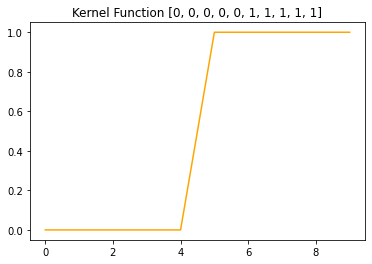

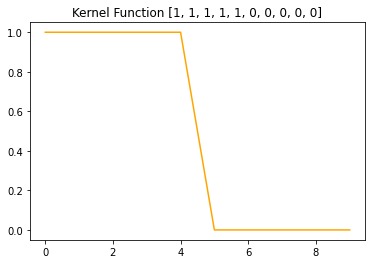

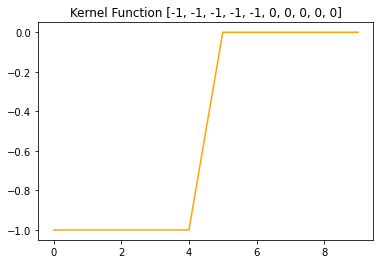

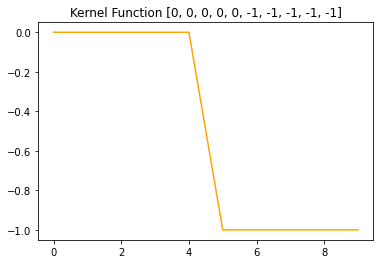

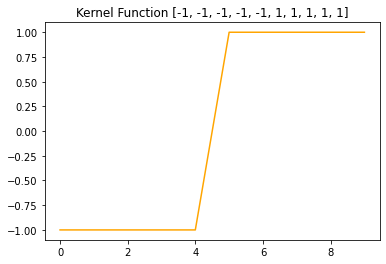

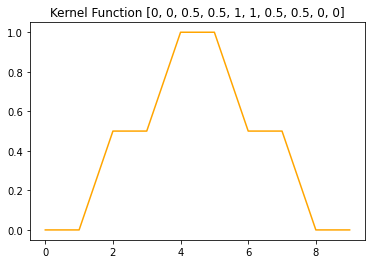

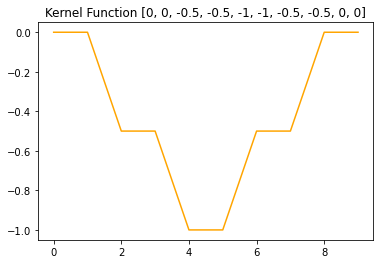

In [6]:
kernels = [A, B, C, D, E, F, G] # Store the kernel functions into an array for iteration.

for kernel in kernels:
    plt.plot(kernel, color="orange") # Plot the kernel.
    plt.title("Kernel Function {}".format(kernel)) # Set the array values as the plot title. 
    plt.show() # Show the plot.

#### Convolution of the generated sine wave and kernel function A.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: A
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -3.139019543689283e-12
standard deviation: 2.2742978240694986e-12
standard error: 2.1783822363150356e-13




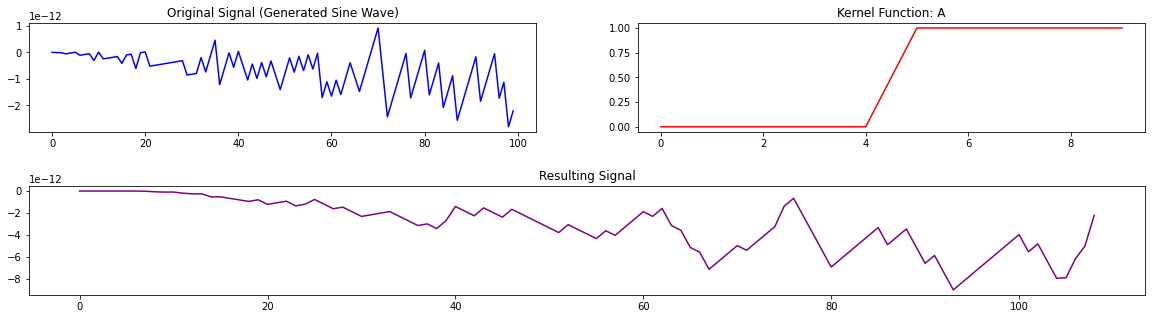

In [7]:
a = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=A, kernel_label="A")

#### Convolution of the generated sine wave and kernel function B.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: B
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -3.139019543689283e-12
standard deviation: 2.2742978240694982e-12
standard error: 2.178382236315035e-13




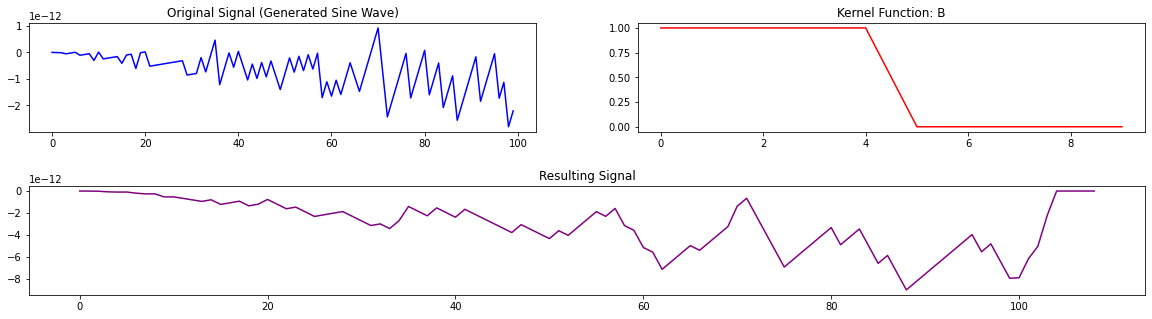

In [8]:
b = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=B, kernel_label="B")

#### Convolution of the generated sine wave and kernel function C.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: C
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 3.139019543689283e-12
standard deviation: 2.2742978240694982e-12
standard error: 2.178382236315035e-13




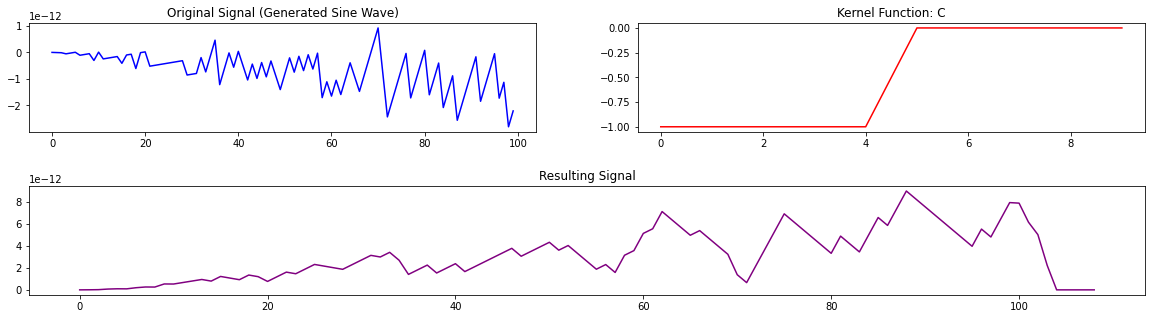

In [9]:
c = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=C, kernel_label="C")

#### Convolution of the generated sine wave and kernel function D.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: D
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 3.139019543689283e-12
standard deviation: 2.2742978240694986e-12
standard error: 2.1783822363150356e-13




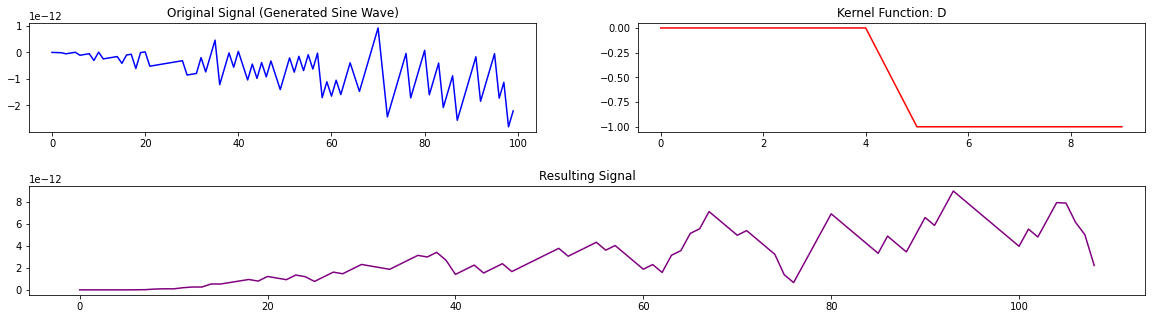

In [10]:
d = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=D, kernel_label="D")

#### Convolution of the generated sine wave and kernel function E.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: E
mean: 0.0
standard deviation: 1.0
standard error: 0.31622776601683794


Resulting Signal
mean: -1.482190031094158e-29
standard deviation: 2.3785525110113205e-12
standard error: 2.2782401158254147e-13




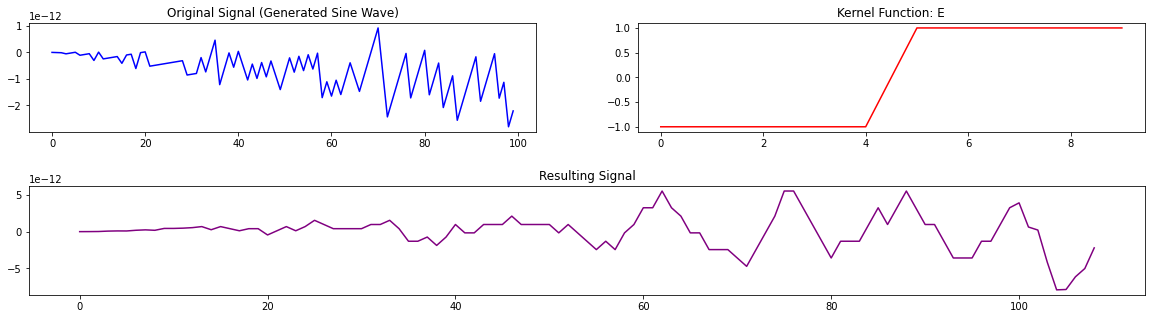

In [11]:
e = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=E, kernel_label="E")

#### Convolution of the generated sine wave and kernel function F.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: F
mean: 0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: -2.511215634951426e-12
standard deviation: 1.7982620136851588e-12
standard error: 1.722422624422363e-13




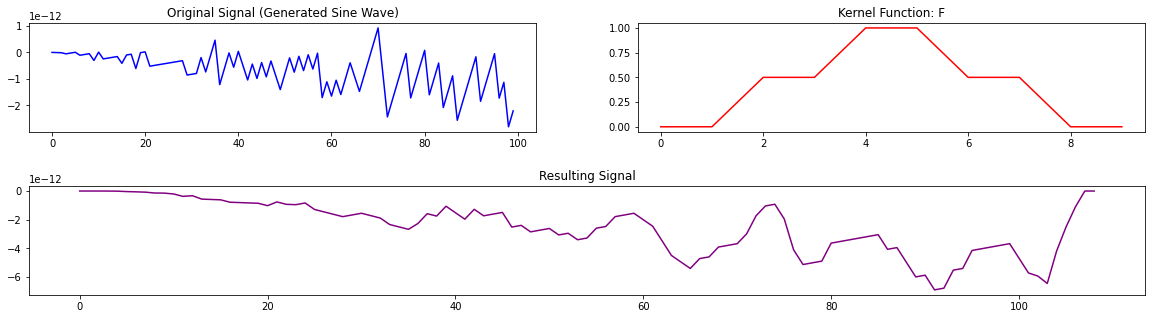

In [12]:
f = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=F, kernel_label="F")

#### Convolution of the generated sine wave and kernel function G.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: G
mean: -0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: 2.511215634951426e-12
standard deviation: 1.7982620136851588e-12
standard error: 1.722422624422363e-13




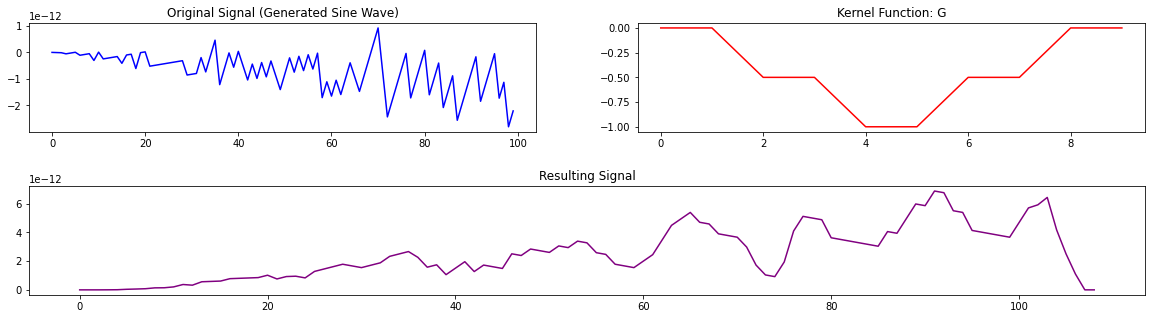

In [13]:
g = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=G, kernel_label="G")

### Perform a convolution of both the sine wave and the new set of kernel arrays.

Generate another set of kernel arrays using the scipy wavelet library to convolve with the sine wave.

In [14]:
daubechie_wavelet = wavelets.daub(8) # Daubechie wavelet.
morlet_wavelet = wavelets.morlet2(20,4,2) # Morlet wavelet.
ricker_wavelet = wavelets.ricker(20,1) # Ricker wavelet.

Plot the generated wavelets.

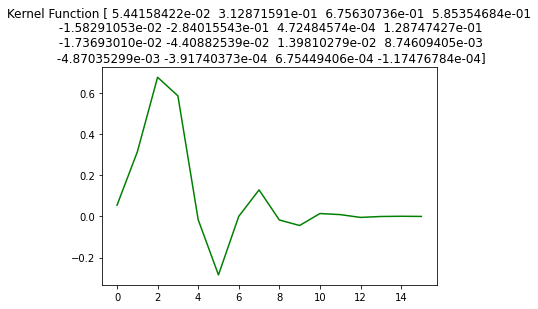

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


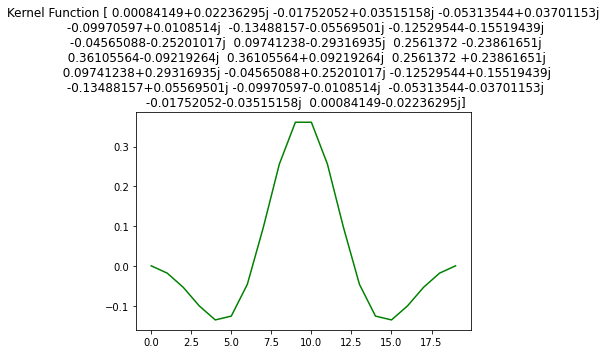

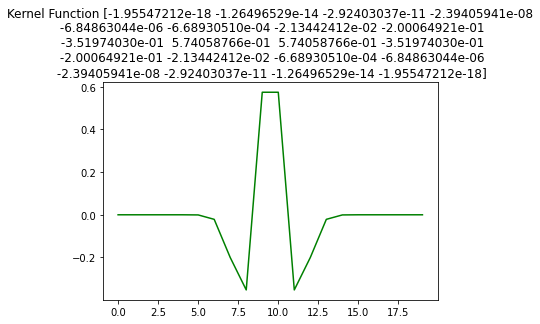

In [15]:
wavelets = [daubechie_wavelet, morlet_wavelet, ricker_wavelet] # Store the kernel functions into an array for iteration.

for wavelet in wavelets:
    plt.plot(wavelet, color="green") # Plot the wavelet.
    plt.title("Kernel Function {}".format(wavelet)) # Set the array values as the plot title. 
    plt.show() # Show the plot.

#### Convolution of the generated sine wave and kernel function Daubechie wavelet.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: Daubechie wavelet
mean: 0.08838834764831845
standard deviation: 0.2338535866733715
standard error: 0.058463396668342875


Resulting Signal
mean: -8.415262560436784e-13
standard deviation: 8.488921898915868e-13
standard error: 7.915960487515542e-14




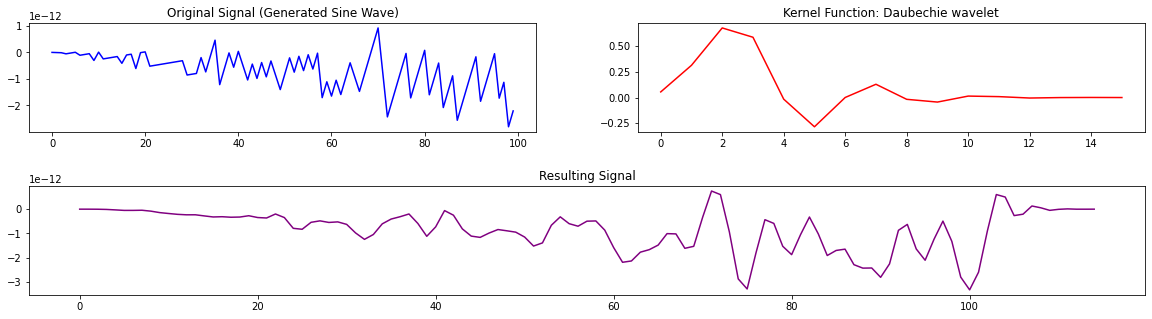

In [16]:
dw = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=daubechie_wavelet, kernel_label="Daubechie wavelet")

#### Convolution of the generated sine wave and kernel function Morlet wavelet.

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: Morlet wavelet
mean: (0.023925690473745282+2.688821387764051e-18j)
standard deviation: 0.22228041651067418
standard error: 0.04970341213848341


Resulting Signal
mean: (-2.7516806350503587e-13-6.788181234842992e-30j)
standard deviation: 7.684654611314441e-13
standard error: 7.044511332372862e-14




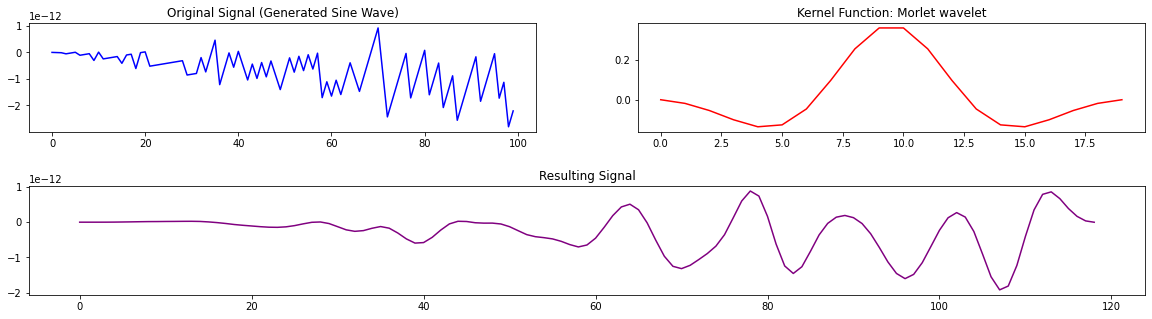

In [17]:
mw = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=morlet_wavelet, kernel_label="Morlet wavelet")

#### Convolution of the generated sine wave and kernel function Ricker wavelet.

Original Signal
mean: -6.843062605242636e-13
standard deviation: 6.905794595056059e-13
standard error: 6.90579459505606e-14


Kernel Function: Ricker wavelet
mean: -2.2961598085130707e-08
standard deviation: 0.22224112623996306
standard error: 0.04969462656686696


Resulting Signal
mean: 2.640800894815112e-19
standard deviation: 5.89653603197521e-13
standard error: 5.4053457181843675e-14




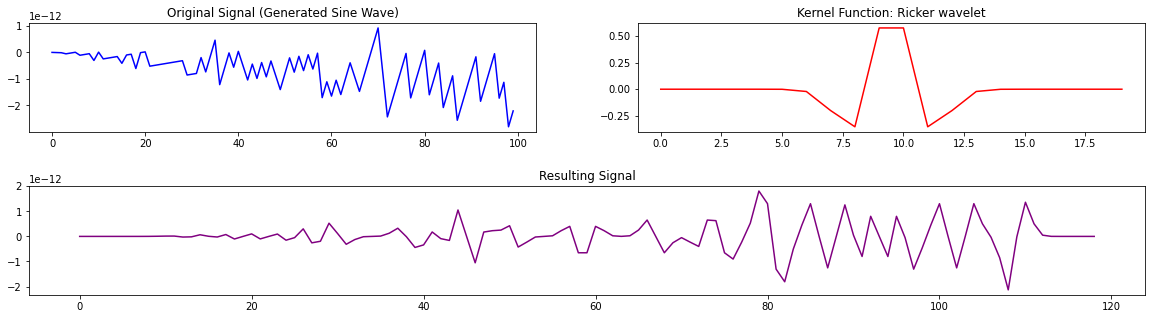

In [18]:
rw = convolveSignals(original_signal=sinewave, original_signal_label="Generated Sine Wave", kernel_function=ricker_wavelet, kernel_label="Ricker wavelet")

### Applying the kernel functions to the analysis summaries of the original steps from Activity 1.

Load the analysis summary from Activity 1.

In [19]:
FILEPATH = './dataset/original_summary.csv' # File path of the analysis summaries from Activity 1.
analysis_df = pd.read_csv(FILEPATH) # Load the .csv file into a data frame.
analysis_df # Preview the data frame.

,Step Number,Mean,Standard Deviation,Standard Error
0,0,-0.000213,0.064778,0.000317
1,1,-0.000697,0.063846,0.000313
2,2,-0.000249,0.064671,0.000317
3,3,-0.000214,0.064206,0.000315
4,4,-0.000307,0.063390,0.000311
...,...,...,...,...
191,191,-0.000309,0.080963,0.000397
192,192,-0.000387,0.068082,0.000334
193,193,-0.000317,0.066013,0.000323
194,194,-0.000575,0.066285,0.000325


Convert the mean entries into a `numpy` array.

In [20]:
analysis_df_mean = analysis_df["Mean"] # Extract the mean column.
means_per_step = np.array(list(analysis_df_mean)) # Convert the column into a numpy array.
means_per_step # Preview the array.

array([-2.13224140e-04, -6.97099170e-04, -2.49145442e-04, -2.14104906e-04,
       -3.06505880e-04, -2.60572769e-04, -2.53480536e-04, -2.44456895e-04,
       -2.72349254e-04, -1.85391926e-04, -2.67014160e-04, -2.36546729e-04,
       -6.85499952e-04, -6.75069193e-04, -6.00361110e-04, -6.71204291e-04,
       -6.97804949e-04, -6.85206643e-04, -1.74142178e-04, -6.86380910e-04,
       -6.85733140e-04, -7.26044953e-04, -7.12216603e-04, -6.93290885e-04,
       -7.56225652e-04, -7.82413911e-04, -6.68450103e-04, -7.15616234e-04,
       -3.81216051e-04, -8.32104378e-04, -3.31996400e-04, -4.20357798e-04,
       -4.16607330e-04, -4.94891614e-04, -4.07642754e-04, -3.61059833e-04,
       -3.34577209e-04, -2.44280132e-04, -2.03966495e-04, -2.32151010e-04,
       -2.79206691e-04, -2.82074209e-04, -2.77504464e-04, -2.31976192e-04,
       -2.27346926e-04, -9.86733548e-05, -1.88555489e-04, -2.40294629e-04,
       -2.48442399e-04, -2.71176523e-04, -2.62677075e-04, -1.81819181e-04,
       -2.15923247e-04, -

Convert the standard deviation entries into a `numpy` array.

In [21]:
analysis_df_std = analysis_df["Standard Deviation"] # Extract the standard deviation column.
std_per_step = np.array(list(analysis_df_std)) # Convert the column into a numpy array.
std_per_step # Preview the array.

array([0.064778  , 0.06384584, 0.06467103, 0.06420572, 0.06339037,
       0.06416537, 0.06385757, 0.06438543, 0.0637517 , 0.06493378,
       0.06454328, 0.06392665, 0.06304775, 0.06440092, 0.06423588,
       0.06495128, 0.06413322, 0.06492901, 0.06353499, 0.06411806,
       0.06395756, 0.06473467, 0.06498385, 0.06457692, 0.06447915,
       0.06325376, 0.06376341, 0.06410794, 0.06277668, 0.06444385,
       0.06477999, 0.0648866 , 0.06397986, 0.06404635, 0.06473669,
       0.06427666, 0.06504457, 0.06482542, 0.06509443, 0.0645085 ,
       0.06448343, 0.06447926, 0.06410996, 0.06520773, 0.06426531,
       0.06395422, 0.0653789 , 0.06505455, 0.06442765, 0.0649546 ,
       0.06382566, 0.06414219, 0.06453856, 0.06456784, 0.06520411,
       0.06469577, 0.06541305, 0.06413444, 0.06486532, 0.06483664,
       0.06444096, 0.06393073, 0.06486345, 0.06497322, 0.06463112,
       0.06518919, 0.06471411, 0.06509777, 0.06490349, 0.06488833,
       0.06463536, 0.06470267, 0.0651446 , 0.06517324, 0.06540

Convert the standard error entries into a `numpy` array.

In [22]:
analysis_df_sem = analysis_df["Standard Error"] # Extract the standard deviation column.
sem_per_step = np.array(list(analysis_df_sem)) # Convert the column into a numpy array.
sem_per_step # Preview the array.

array([0.00031735, 0.00031278, 0.00031682, 0.00031455, 0.00031055,
       0.00031435, 0.00031284, 0.00031543, 0.00031232, 0.00031811,
       0.0003162 , 0.00031318, 0.00030887, 0.0003155 , 0.00031469,
       0.0003182 , 0.00031419, 0.00031809, 0.00031126, 0.00031412,
       0.00031333, 0.00031714, 0.00031836, 0.00031636, 0.00031588,
       0.00030988, 0.00031238, 0.00031407, 0.00030754, 0.00031571,
       0.00031736, 0.00031788, 0.00031344, 0.00031376, 0.00031715,
       0.00031489, 0.00031865, 0.00031758, 0.0003189 , 0.00031603,
       0.00031591, 0.00031589, 0.00031408, 0.00031945, 0.00031484,
       0.00031331, 0.00032029, 0.0003187 , 0.00031563, 0.00031821,
       0.00031268, 0.00031423, 0.00031618, 0.00031632, 0.00031944,
       0.00031695, 0.00032046, 0.0003142 , 0.00031778, 0.00031764,
       0.0003157 , 0.0003132 , 0.00031777, 0.00031831, 0.00031663,
       0.00031936, 0.00031704, 0.00031892, 0.00031796, 0.00031789,
       0.00031665, 0.00031698, 0.00031914, 0.00031928, 0.00032

### Convolution of means per step to different kernel functions.

#### Convolution of the means per step and kernel function A.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: A
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -0.0020155773836769285
standard deviation: 0.0007459160353108891
standard error: 5.209703571614554e-05




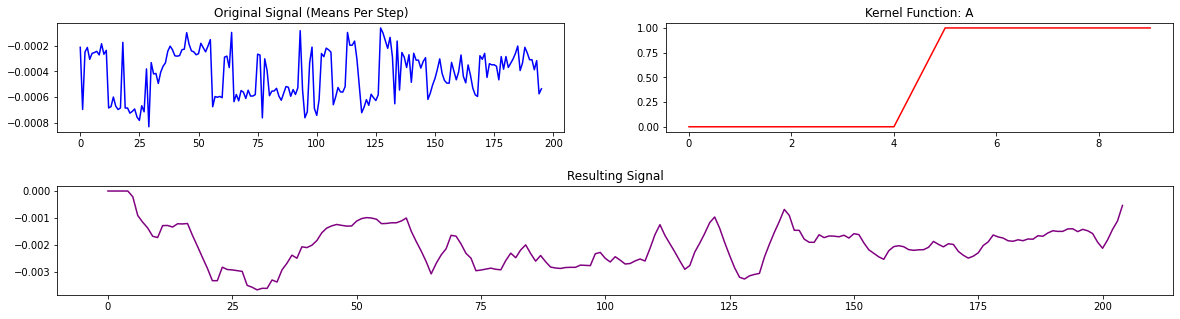

In [23]:
ma = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=A, kernel_label="A")

#### Convolution of the means per step and kernel function B.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: B
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -0.0020155773836769285
standard deviation: 0.0007459160353108891
standard error: 5.209703571614554e-05




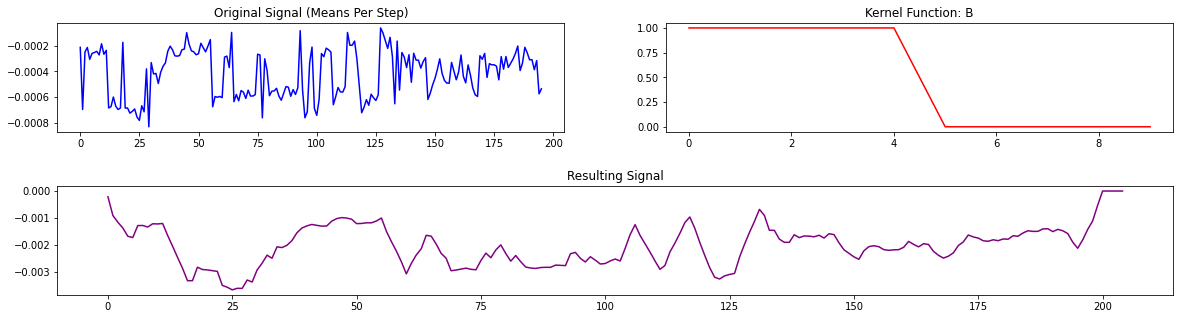

In [24]:
mb = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=B, kernel_label="B")

#### Convolution of the means per step and kernel function C.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: C
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.0020155773836769285
standard deviation: 0.0007459160353108891
standard error: 5.209703571614554e-05




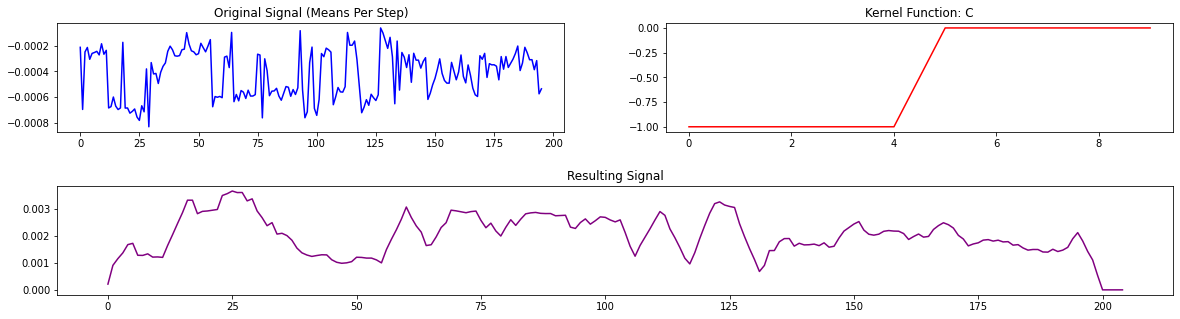

In [25]:
mc = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=C, kernel_label="C")

#### Convolution of the means per step and kernel function D.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: D
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.0020155773836769285
standard deviation: 0.0007459160353108891
standard error: 5.209703571614554e-05




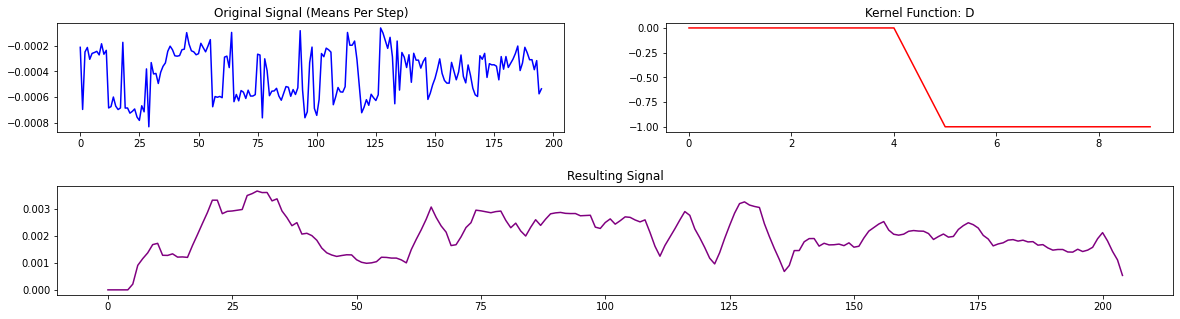

In [26]:
md = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=D, kernel_label="D")

#### Convolution of the means per step and kernel function E.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: E
mean: 0.0
standard deviation: 1.0
standard error: 0.31622776601683794


Resulting Signal
mean: 1.692413147294446e-20
standard deviation: 0.0007994453506031548
standard error: 5.5835685267337554e-05




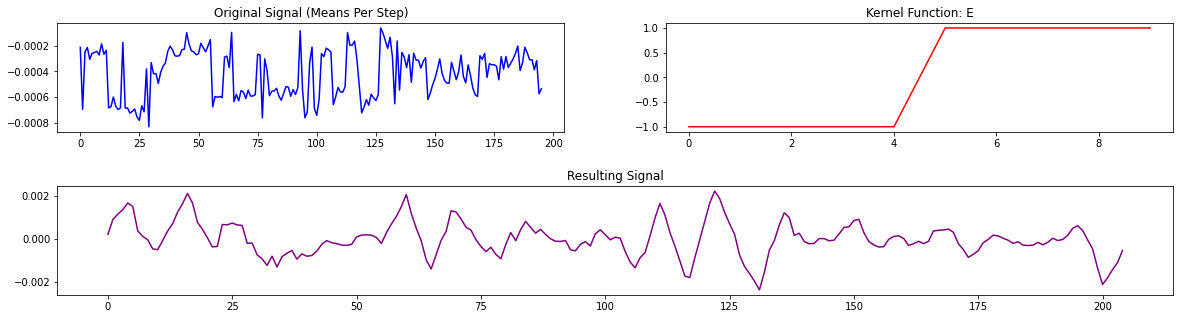

In [27]:
me = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=E, kernel_label="E")

#### Convolution of the means per step and kernel function F.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: F
mean: 0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: -0.001612461906941543
standard deviation: 0.0005900972974274896
standard error: 4.121418299751103e-05




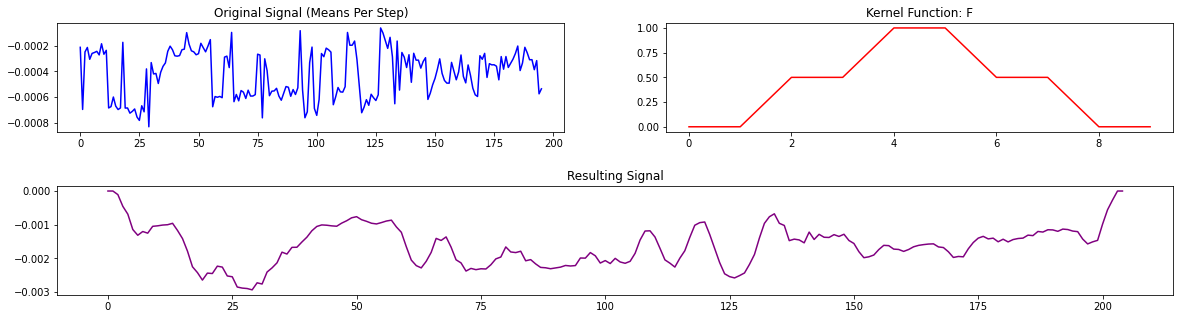

In [28]:
mf = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=F, kernel_label="F")

#### Convolution of the means per step and kernel function G.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: G
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.0020155773836769285
standard deviation: 0.0007459160353108891
standard error: 5.209703571614554e-05




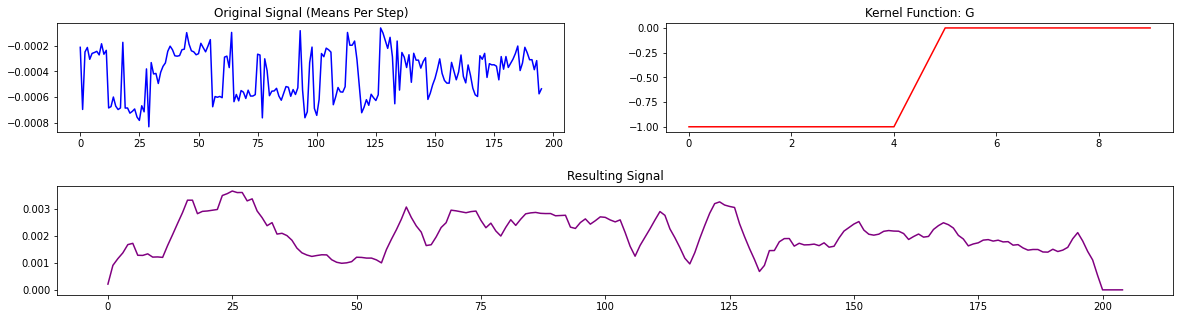

In [29]:
mg = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=C, kernel_label="G")

#### Convolution of the generated sine wave and kernel function Daubechie wavelet.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: Daubechie wavelet
mean: 0.08838834764831845
standard deviation: 0.2338535866733715
standard error: 0.058463396668342875


Resulting Signal
mean: -0.0005538802452717729
standard deviation: 0.00026723340320944464
standard error: 1.8397106174523485e-05




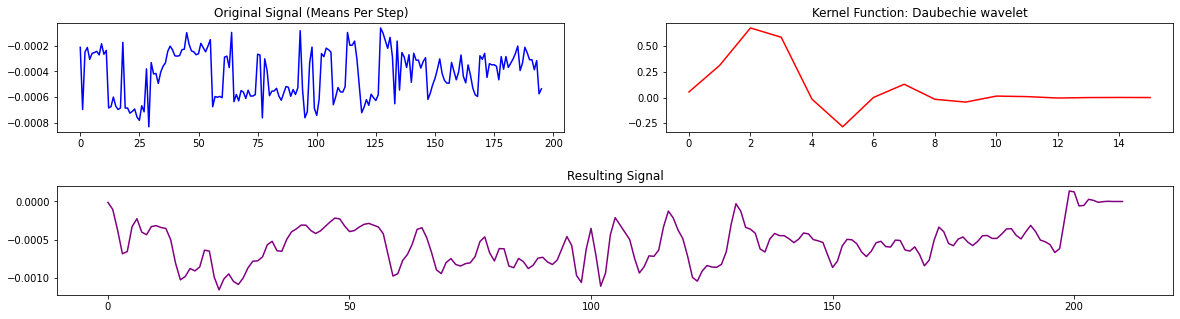

In [30]:
m_dw = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=daubechie_wavelet, kernel_label="Daubechie wavelet")

#### Convolution of the generated sine wave and kernel function Morlet wavelet.

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: Morlet wavelet
mean: (0.023925690473745282+2.688821387764051e-18j)
standard deviation: 0.22228041651067418
standard error: 0.04970341213848341


Resulting Signal
mean: (-0.0001839244004574099+0j)
standard deviation: 0.00026334460942776324
standard error: 1.795995329597972e-05




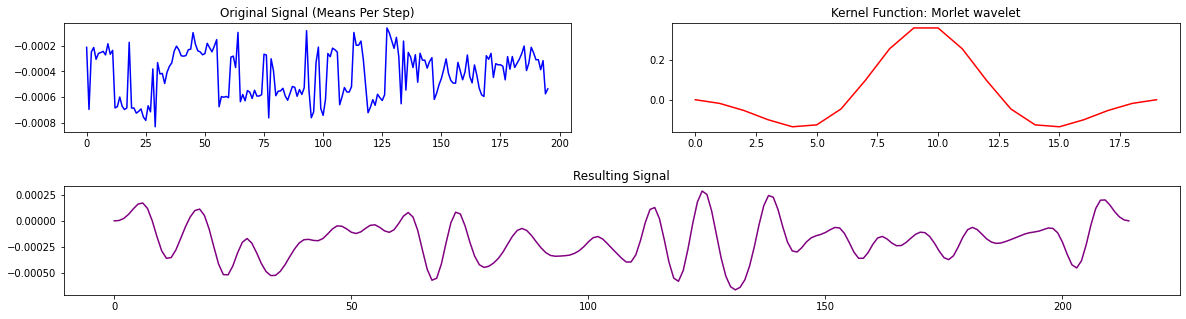

In [31]:
m_mw = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=morlet_wavelet, kernel_label="Morlet wavelet")

#### Convolution of the generated sine wave and kernel function Ricker wavelet.

Original Signal
mean: -0.00042162588127935745
standard deviation: 0.00018294084537578766
standard error: 1.306720324112769e-05


Kernel Function: Ricker wavelet
mean: -2.2961598085130707e-08
standard deviation: 0.22224112623996306
standard error: 0.04969462656686696


Resulting Signal
mean: 1.7651311532411936e-10
standard deviation: 0.0001446510286783366
standard error: 9.865118275720668e-06




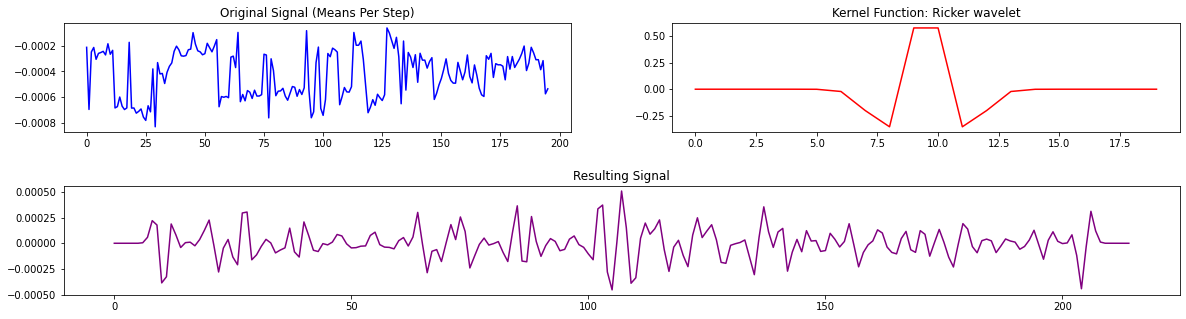

In [32]:
m_rw = convolveSignals(original_signal=means_per_step, original_signal_label="Means Per Step", kernel_function=ricker_wavelet, kernel_label="Ricker wavelet")

### Convolution of standard deviation per step to different kernel functions.

#### Convolution of the standard deviation per step and kernel function A.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: A
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.5143490020765822
standard deviation: 0.30769662724851177
standard error: 0.021490464637647973




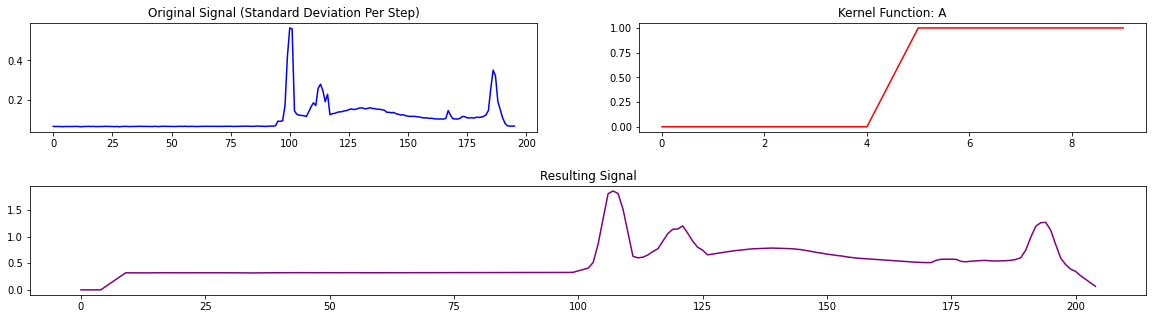

In [33]:
stda = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=A, kernel_label="A")

#### Convolution of the standard deviation per step and kernel function B.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: B
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.5143490020765822
standard deviation: 0.3076966272485117
standard error: 0.02149046463764797




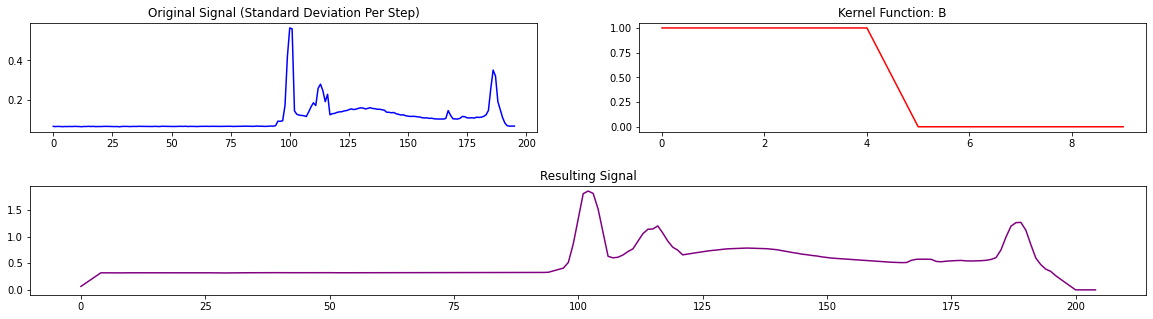

In [34]:
stdb = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=B, kernel_label="B")

#### Convolution of the standard deviation per step and kernel function C.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: C
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -0.5143490020765822
standard deviation: 0.3076966272485117
standard error: 0.02149046463764797




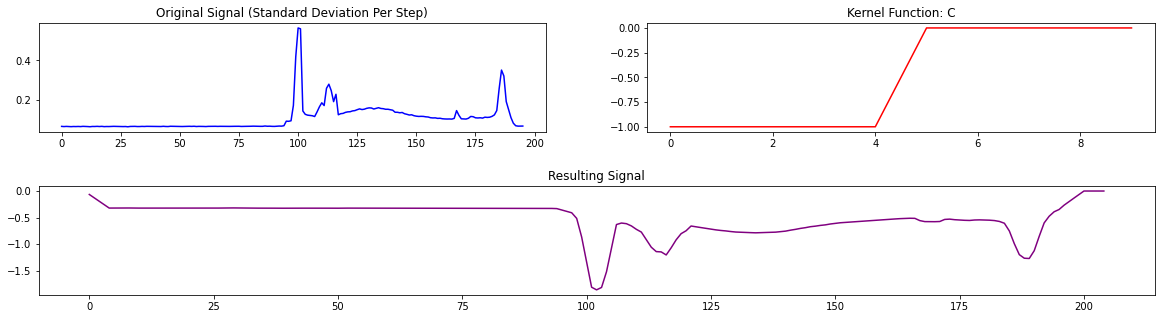

In [35]:
stdc = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=C, kernel_label="C")

#### Convolution of the standard deviation per step and kernel function D.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: D
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -0.5143490020765822
standard deviation: 0.30769662724851177
standard error: 0.021490464637647973




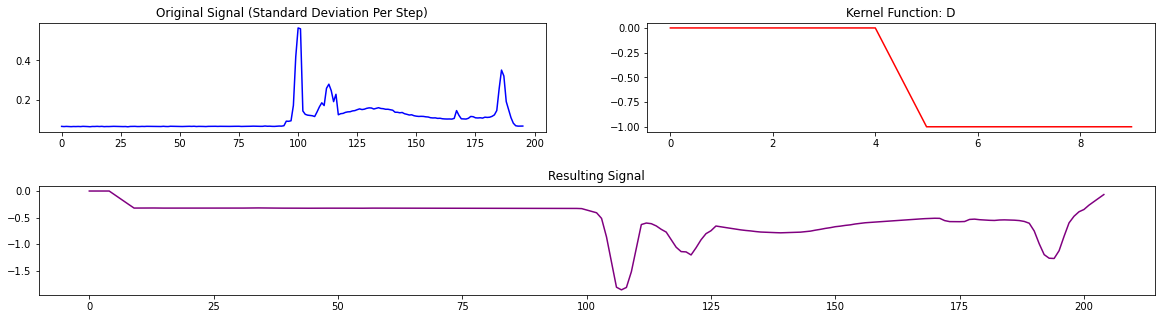

In [36]:
stdd = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=D, kernel_label="D")

#### Convolution of the standard deviation per step and kernel function E.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: E
mean: 0.0
standard deviation: 1.0
standard error: 0.31622776601683794


Resulting Signal
mean: 0.0
standard deviation: 0.31387488858272383
standard error: 0.02192197312674752




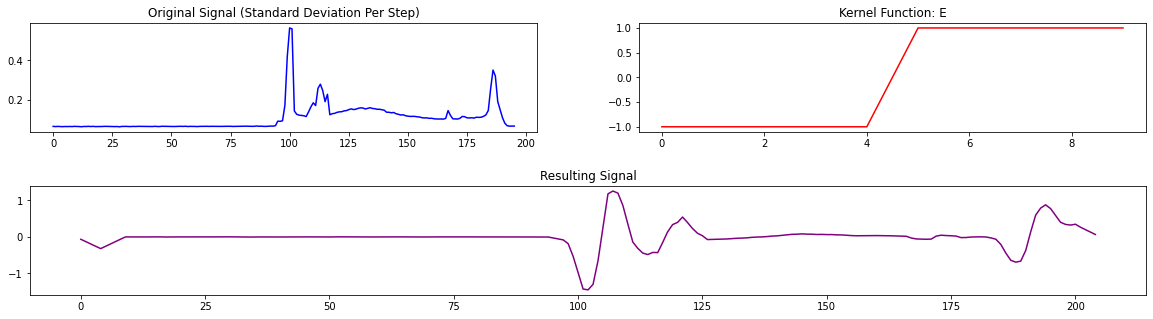

In [37]:
stde = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=E, kernel_label="E")

#### Convolution of the standard deviation per step and kernel function F.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: F
mean: 0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: 0.4114792016612657
standard deviation: 0.24420122859861568
standard error: 0.017055753631742554




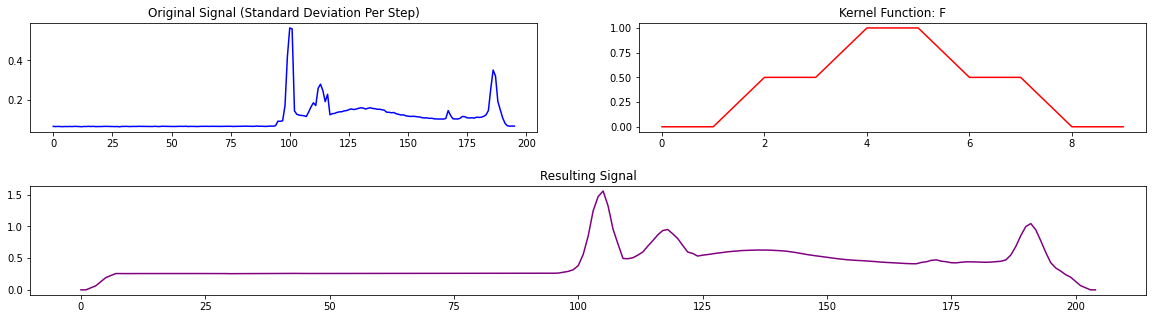

In [38]:
stdf = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=F, kernel_label="F")

#### Convolution of the standard deviation per step and kernel function G.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: G
mean: -0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: -0.4114792016612657
standard deviation: 0.24420122859861568
standard error: 0.017055753631742554




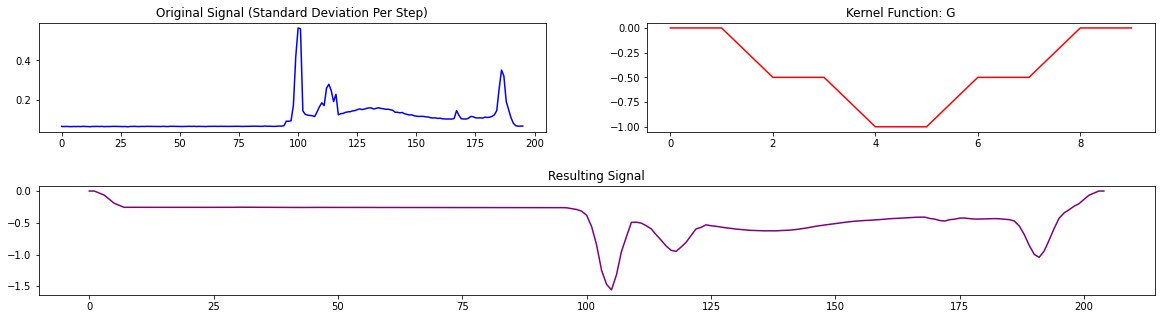

In [39]:
stdg = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=G, kernel_label="G")

#### Convolution of the standard deviation per step and kernel function Daubechie wavelet.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: Daubechie wavelet
mean: 0.08838834764831845
standard deviation: 0.2338535866733715
standard error: 0.058463396668342875


Resulting Signal
mean: 0.14134299865270408
standard deviation: 0.10293150434868421
standard error: 0.007086096990360237




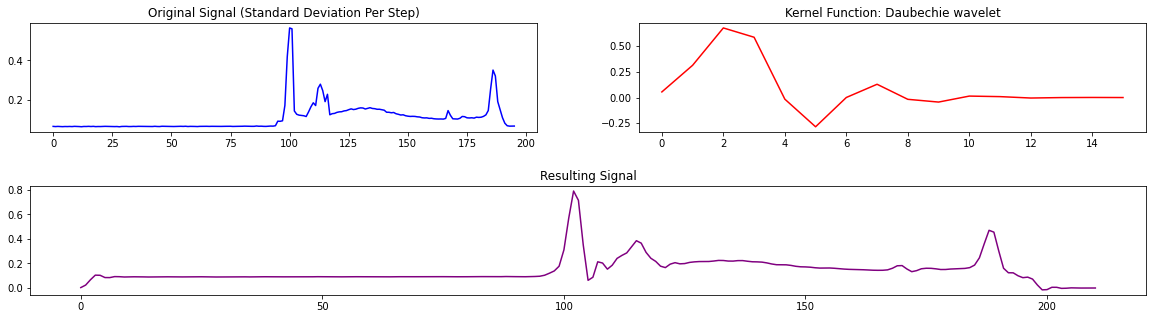

In [40]:
std_dw = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=daubechie_wavelet, kernel_label="Daubechie wavelet")

#### Convolution of the standard deviation per step and kernel function Morlet wavelet.

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: Morlet wavelet
mean: (0.023925690473745282+2.688821387764051e-18j)
standard deviation: 0.22228041651067418
standard error: 0.04970341213848341


Resulting Signal
mean: (0.04693510286378857+1.290957005378089e-18j)
standard deviation: 0.10489754140431141
standard error: 0.007153952946211001




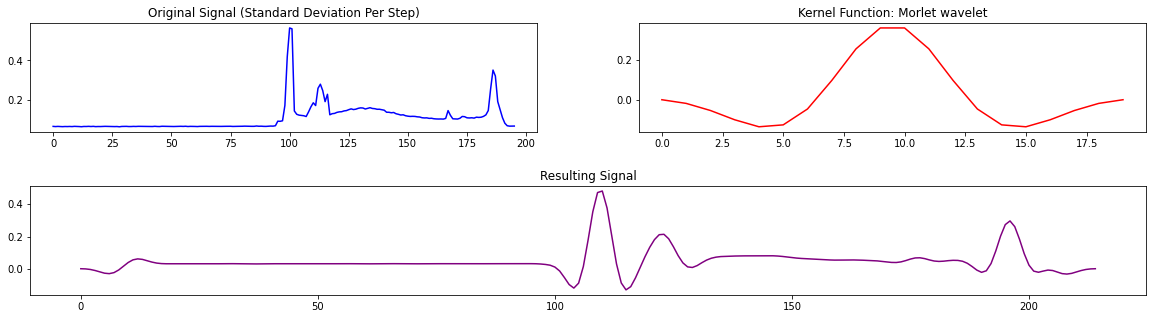

In [41]:
std_mw = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=morlet_wavelet, kernel_label="Morlet wavelet")

#### Convolution of the standard deviation per step and kernel function Ricker wavelet.

Original Signal
mean: 0.10759341369969323
standard deviation: 0.07123222140925839
standard error: 0.005088015814947028


Kernel Function: Ricker wavelet
mean: -2.2961598085130707e-08
standard deviation: 0.22224112623996306
standard error: 0.04969462656686696


Resulting Signal
mean: -4.5043839771980416e-08
standard deviation: 0.043216877598583496
standard error: 0.0029473665891822255




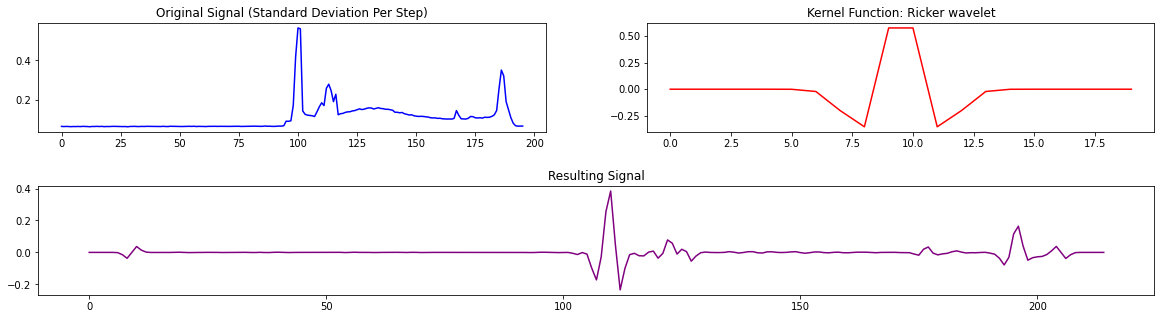

In [42]:
std_rw = convolveSignals(original_signal=std_per_step, original_signal_label="Standard Deviation Per Step", kernel_function=ricker_wavelet, kernel_label="Ricker wavelet")

### Convolution of standard error per step to different kernel functions.

#### Convolution of the standard error per step and kernel function A.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: A
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.0025198053681180607
standard deviation: 0.0015074115240088254
standard error: 0.00010528218765599545




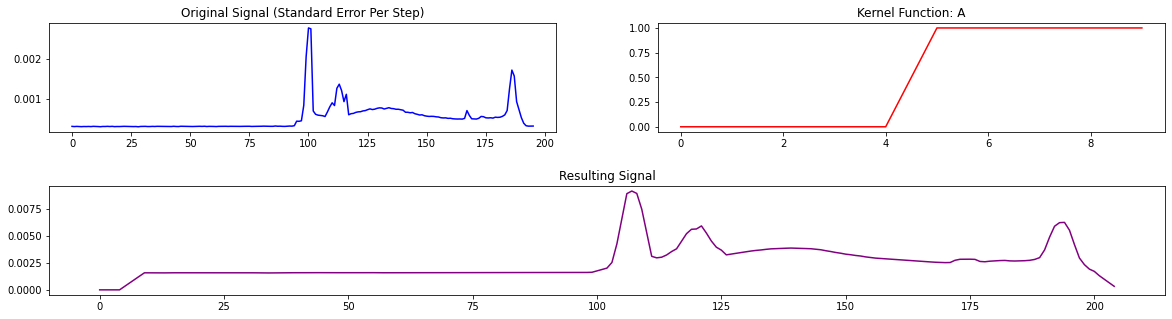

In [43]:
sema = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=A, kernel_label="A")

#### Convolution of the standard error per step and kernel function B.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: B
mean: 0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: 0.0025198053681180607
standard deviation: 0.0015074115240088256
standard error: 0.00010528218765599546




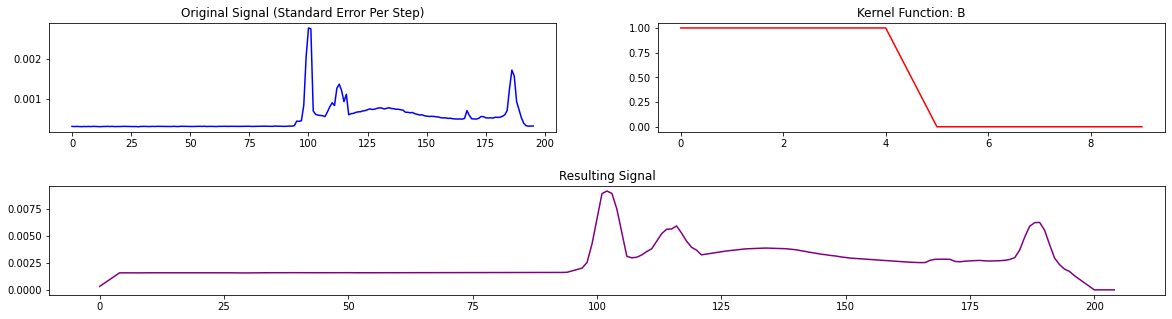

In [44]:
semb = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=B, kernel_label="B")

#### Convolution of the standard error per step and kernel function C.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: C
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -0.0025198053681180607
standard deviation: 0.0015074115240088256
standard error: 0.00010528218765599546




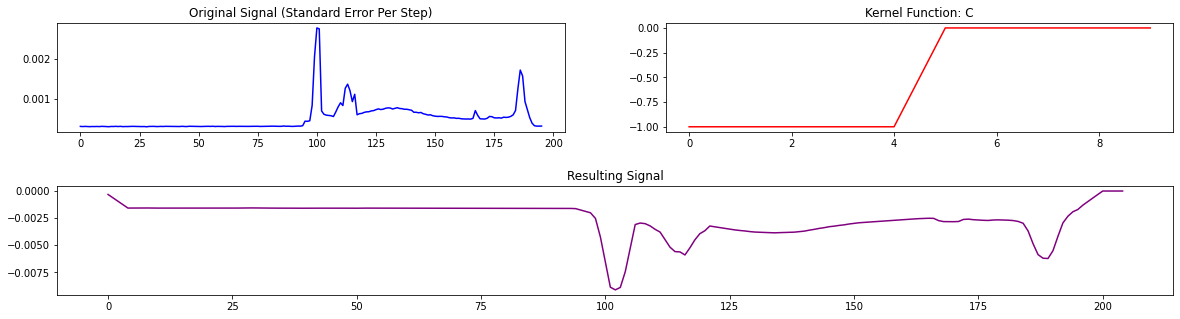

In [45]:
semc = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=C, kernel_label="C")

#### Convolution of the standard error per step and kernel function D.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: D
mean: -0.5
standard deviation: 0.5
standard error: 0.15811388300841897


Resulting Signal
mean: -0.0025198053681180607
standard deviation: 0.0015074115240088254
standard error: 0.00010528218765599545




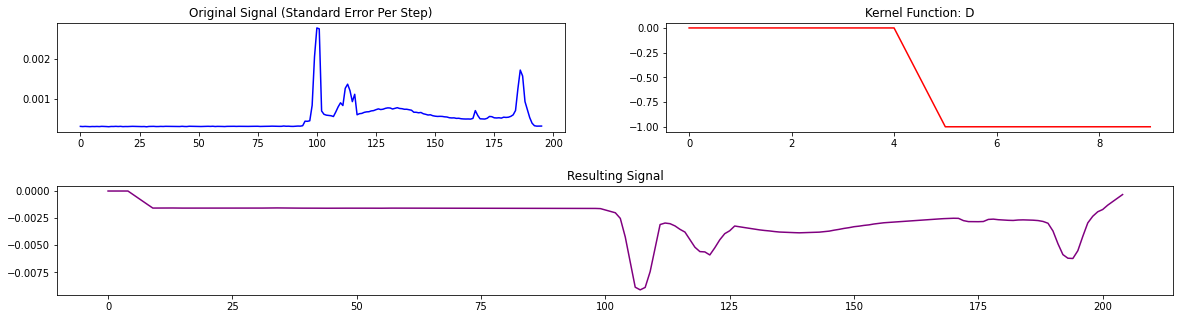

In [46]:
semd = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=D, kernel_label="D")

#### Convolution of the standard error per step and kernel function E.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: E
mean: 0.0
standard deviation: 1.0
standard error: 0.31622776601683794


Resulting Signal
mean: 0.0
standard deviation: 0.0015376789416819102
standard error: 0.00010739615580375485




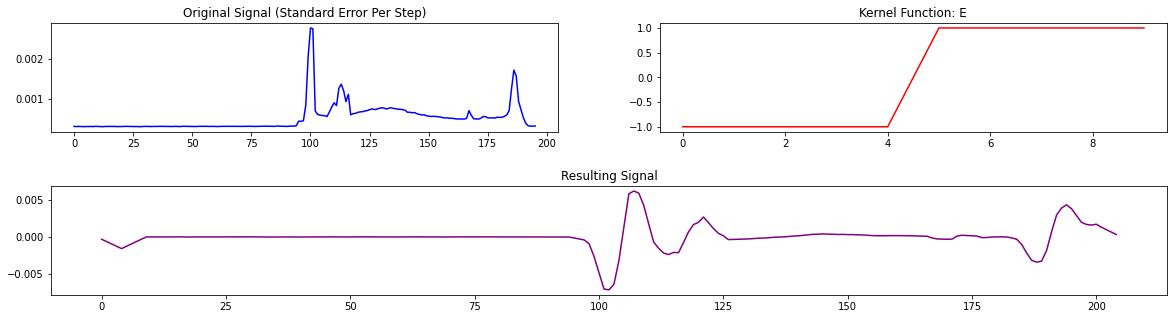

In [47]:
seme = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=E, kernel_label="E")

#### Convolution of the standard error per step and kernel function F.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: F
mean: 0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: 0.0020158442944944485
standard deviation: 0.0011963463800640256
standard error: 8.355645560709816e-05




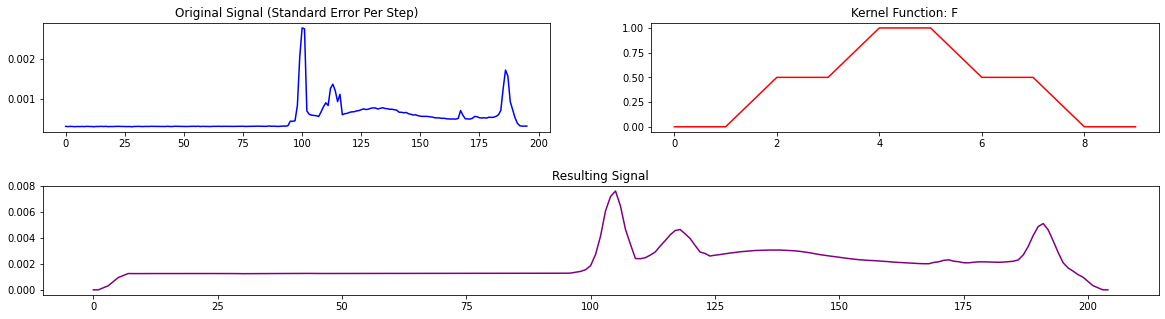

In [48]:
semf = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=F, kernel_label="F")

#### Convolution of the standard error per step and kernel function G.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: G
mean: -0.4
standard deviation: 0.37416573867739417
standard error: 0.11832159566199232


Resulting Signal
mean: -0.0020158442944944485
standard deviation: 0.0011963463800640256
standard error: 8.355645560709816e-05




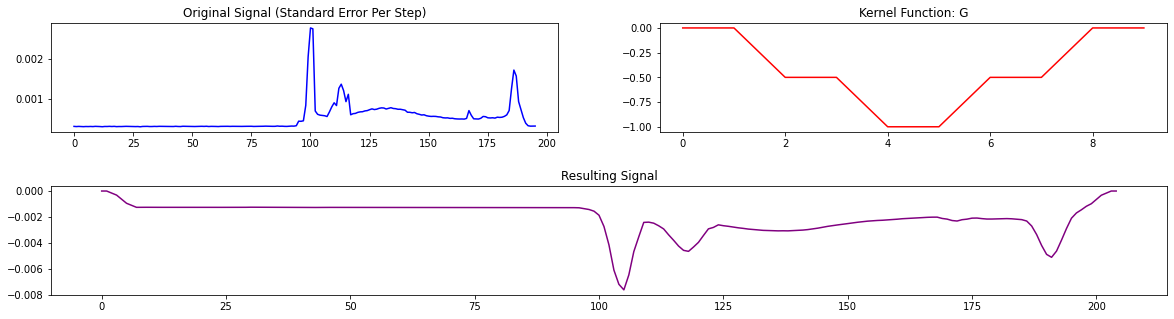

In [49]:
semg = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=G, kernel_label="G")

#### Convolution of the standard error per step and kernel function Daubechie wavelet.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: Daubechie wavelet
mean: 0.08838834764831845
standard deviation: 0.2338535866733715
standard error: 0.058463396668342875


Resulting Signal
mean: 0.0006924419903860509
standard deviation: 0.0005042633623457143
standard error: 3.471492150899063e-05




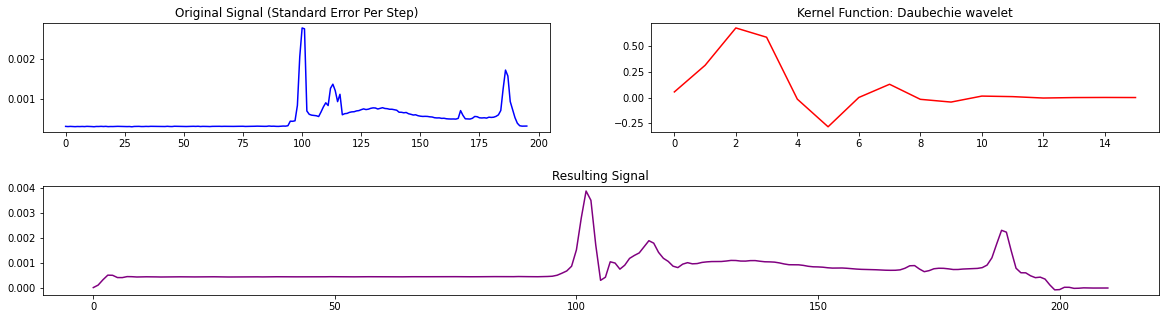

In [50]:
sem_dw = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=daubechie_wavelet, kernel_label="Daubechie wavelet")

#### Convolution of the standard error per step and kernel function Morlet wavelet.

c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: Morlet wavelet
mean: (0.023925690473745282+2.688821387764051e-18j)
standard deviation: 0.22228041651067418
standard error: 0.04970341213848341


Resulting Signal
mean: (0.0002299359455775493+3.025680481354896e-21j)
standard deviation: 0.0005138950146026249
standard error: 3.504734910410865e-05




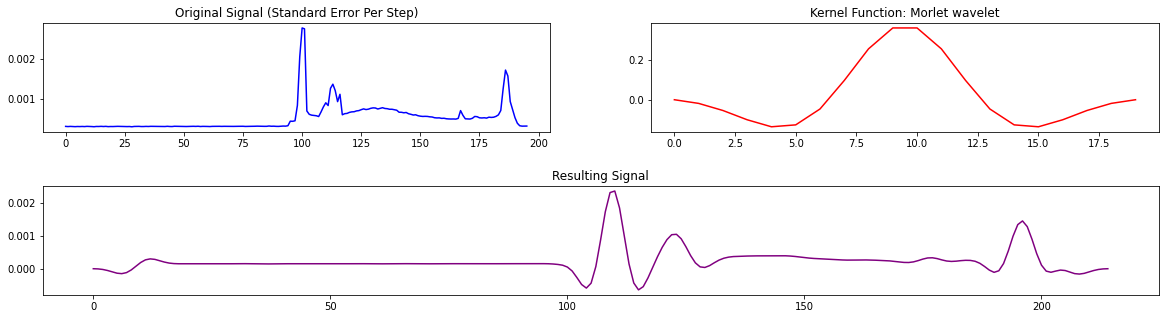

In [51]:
sem_mw = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=morlet_wavelet, kernel_label="Morlet wavelet")

#### Convolution of the standard error per step and kernel function Ricker wavelet.

Original Signal
mean: 0.0005271021433308188
standard deviation: 0.0003489679831503074
standard error: 2.4926284510736244e-05


Kernel Function: Ricker wavelet
mean: -2.2961598085130707e-08
standard deviation: 0.22224112623996306
standard error: 0.04969462656686696


Resulting Signal
mean: -2.2067061237219278e-10
standard deviation: 0.00021172029055478844
standard error: 1.4439203970940968e-05




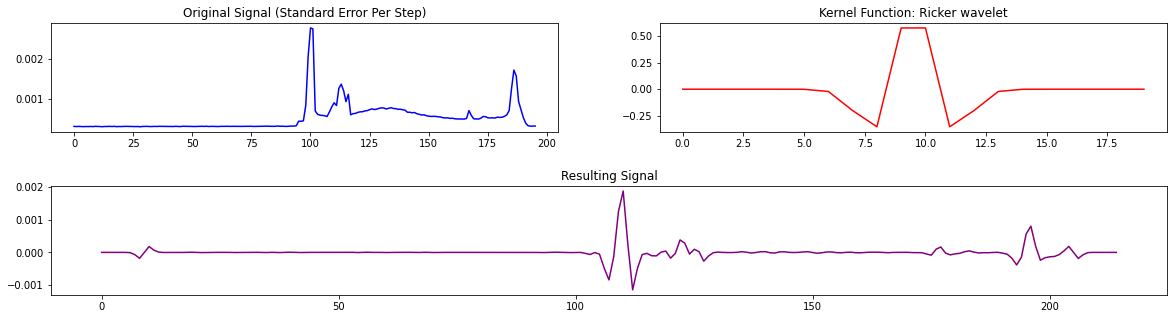

In [52]:
sem_rw = convolveSignals(original_signal=sem_per_step, original_signal_label="Standard Error Per Step", kernel_function=ricker_wavelet, kernel_label="Ricker wavelet")